## Step1: Basic Data Analysis, Data wrangling and Setup for PCA & Visualizations. 

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
df = pd.read_csv("eurosat_model_eval_09102023.csv")
df.head()

,Start Time,Duration,Run ID,Name,Source Type,Source Name,User,Status,JaticVisionDatasetGenerator._func,JaticVisionDatasetGenerator.batch_size,...,load_dataset.provider,load_dataset.split,load_dataset.task,load_model._func,load_model.model_name,load_model.provider,load_model.task,adversarial_mean_categorical_accuracy,benign_mean_categorical_accuracy,perturbation_mean_linf
0,2023-09-07 17:52:50,9.7min,8e67d421ee3a46de947652d213227e7f,grandiose-lynx-117,LOCAL,model_and_parameter_evaluation/mrm8488--convne...,ubuntu,FINISHED,charmory.data.JaticVisionDatasetGenerator.__in...,128,...,huggingface,validation,image-classification,jatic_toolbox._internals.interop.api.load_model,mrm8488/convnext-tiny-finetuned-eurosat,huggingface,image-classification,0.945185,0.985185,0.020000
1,2023-09-07 17:46:05,6.8min,db92fb7fb8d441cbb604f51c7fd7d624,big-skink-852,LOCAL,model_and_parameter_evaluation/mrm8488--convne...,ubuntu,FINISHED,charmory.data.JaticVisionDatasetGenerator.__in...,128,...,huggingface,validation,image-classification,jatic_toolbox._internals.interop.api.load_model,mrm8488/convnext-tiny-finetuned-eurosat,huggingface,image-classification,0.973704,0.985185,0.020000
2,2023-09-07 17:37:56,23.7min,995a5112f1d7455da35a9929bbcd62b9,adorable-cow-816,LOCAL,model_and_parameter_evaluation/nielsr--swin-ti...,ubuntu,FINISHED,charmory.data.JaticVisionDatasetGenerator.__in...,128,...,huggingface,validation,image-classification,jatic_toolbox._internals.interop.api.load_model,nielsr/swin-tiny-patch4-window7-224-finetuned-...,huggingface,image-classification,0.805556,0.978148,0.012000
3,2023-09-07 17:28:24,17.7min,edb723a7442940fb833ce809f13e9b64,hilarious-yak-384,LOCAL,model_and_parameter_evaluation/mrm8488--convne...,ubuntu,FINISHED,charmory.data.JaticVisionDatasetGenerator.__in...,128,...,huggingface,validation,image-classification,jatic_toolbox._internals.interop.api.load_model,mrm8488/convnext-tiny-finetuned-eurosat,huggingface,image-classification,0.835556,0.985185,0.018000
4,2023-09-07 17:26:41,21.6min,ff28d01c25e144ecb2f682a6280f055c,thundering-robin-603,LOCAL,model_and_parameter_evaluation/nielsr--vit-fin...,ubuntu,FINISHED,charmory.data.JaticVisionDatasetGenerator.__in...,128,...,huggingface,validation,image-classification,jatic_toolbox._internals.interop.api.load_model,nielsr/vit-finetuned-eurosat-kornia,huggingface,image-classification,0.921481,0.966667,0.011997


In [2]:
# PCA 
features = ['ProjectedGradientDescent.eps', 'ProjectedGradientDescent.eps_step','ProjectedGradientDescent.max_iter']

In [3]:
x = df.loc[:, features].values

In [4]:
y = df.loc[:,['adversarial_mean_categorical_accuracy']].values

In [5]:
x = StandardScaler().fit_transform(x)

In [6]:
pca = PCA(n_components=3)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [7]:
finalDf = pd.concat([principalDf, df[['adversarial_mean_categorical_accuracy']]], axis = 1)
finalDf

,principal component 1,principal component 2,principal component 3,adversarial_mean_categorical_accuracy
0,1.277573,-0.223385,-0.0,0.945185
1,1.813629,-0.759441,0.0,0.973704
2,-0.036336,1.679044,0.0,0.805556
3,-0.257031,1.458349,0.0,0.835556
4,0.499721,1.142988,0.0,0.921481
...,...,...,...,...
95,-0.530191,0.113077,0.0,0.912963
96,-0.714104,-0.070836,0.0,0.868148
97,-0.530191,0.113077,0.0,0.839259
98,-0.178047,-0.606892,-0.0,0.911481


In [8]:
finalDf['model_name'] = df['load_model.model_name']

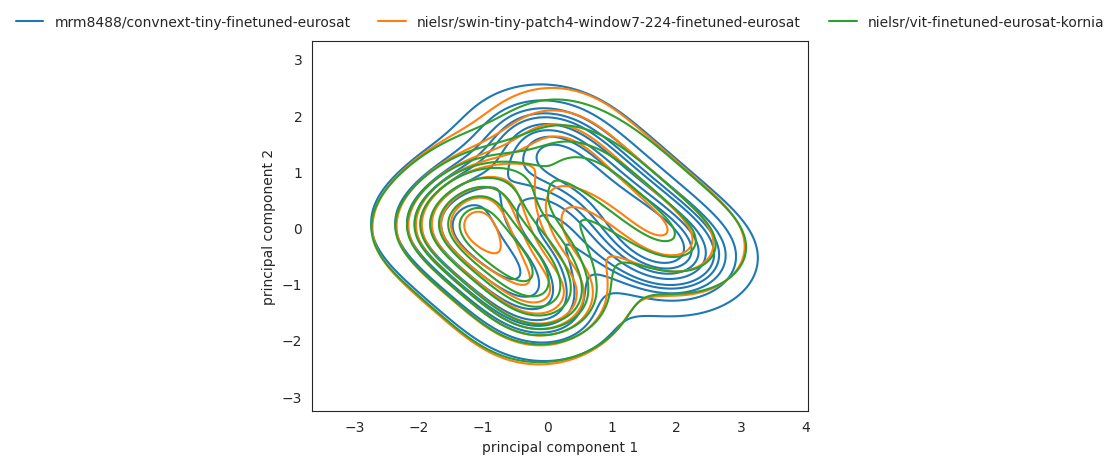

In [9]:
sns.set_style("white")

ax = sns.kdeplot(x=finalDf['principal component 1'], y=finalDf['principal component 2'],hue=finalDf['model_name'])
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
plt.show()

In [10]:
finalDf_convnext = finalDf[finalDf.model_name == 'mrm8488/convnext-tiny-finetuned-eurosat']
finalDf_swin = finalDf[finalDf.model_name == 'nielsr/swin-tiny-patch4-window7-224-finetuned-eurosat']
finalDf_vit = finalDf[finalDf.model_name == 'nielsr/vit-finetuned-eurosat-kornia']

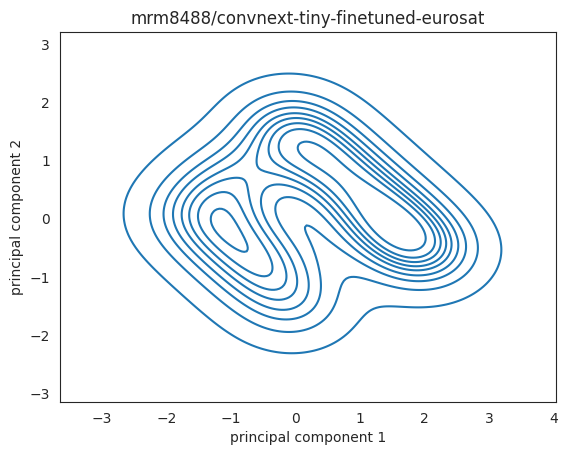

In [11]:
sns.kdeplot(x=finalDf_convnext['principal component 1'], y=finalDf_convnext['principal component 2'])
plt.title('mrm8488/convnext-tiny-finetuned-eurosat')
plt.show()

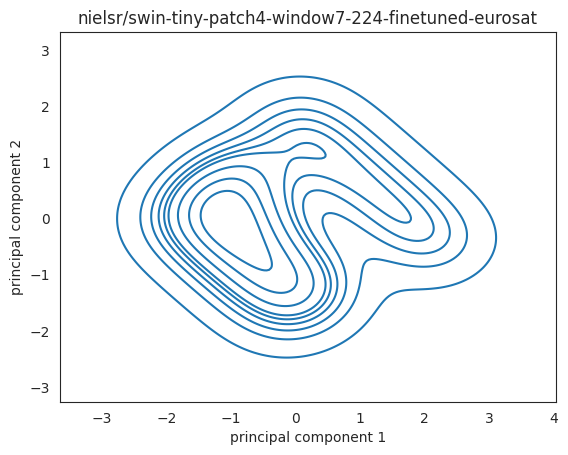

In [12]:
sns.kdeplot(x=finalDf_swin['principal component 1'], y=finalDf_swin['principal component 2'])
plt.title('nielsr/swin-tiny-patch4-window7-224-finetuned-eurosat')
plt.show()

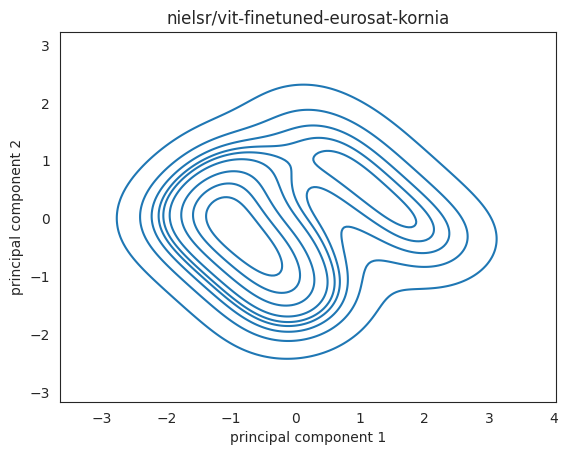

In [13]:
sns.kdeplot(x=finalDf_vit['principal component 1'], y=finalDf_vit['principal component 2'])
plt.title('nielsr/vit-finetuned-eurosat-kornia')
plt.show()